In [6]:
import allel
import malariagen_data
import pandas as pd
import numpy as np
%matplotlib inline
import probe
import json
import locusPocus
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "odds_ratio":np.exp(coeff),
                               "conf_lower":np.exp(conf_lower),
                               "conf_higher":np.exp(conf_higher)
                                })
    
    results_df.loc[:, 'sig'] = ['significant' if pval <= 0.05 else 'not significant' for pval in pvals]

    #Reordering...
    results_df = results_df[["odds_ratio","pvals","conf_lower","conf_higher", "sig"]]
    return results_df

In [8]:
def plot_ors(ax, df, last=False):
    
#     df['odds_lower'] = df['odds_ratio'] - df['odds_lower']
#     df['odds_upper'] = df['odds_upper'] - df['odds_ratio']
        
    ax.errorbar(x=df['odds_ratio'], 
                y=df['index'].to_list(), 
                xerr=(df['odds_lower'].to_list(), 
                      df['odds_upper'].to_list()),
                color='dimgrey',  linewidth=2, capsize=4, linestyle='None',
                marker="o", markersize=10, mfc="dimgrey", mec="black")
    ax.set_xlim(0.5,3)
    ax.set_ylim(0,2)
    ax.axvline(x=1, linewidth=1, linestyle='--', color='black')
    ax.tick_params(axis='both', which='major', labelsize=8)

    if last == False:
        ax.set_xlabel('', fontsize=8)
        ax.set_xticks([])
        sns.despine(ax=ax, bottom=False, left=True)
    if last == True:
        ax.set_xlabel('', fontsize=8)
        ax.set_xticks(np.arange(0.5,3, 0.5))
        sns.despine(ax=ax, bottom=False, left=True)
        ax.tick_params(axis=u'both', which=u'both',length=0, labelsize=10)

    ax.set_yticklabels("")
    ax.set_yticks([])

    plt.tight_layout()

In [81]:
df = pd.DataFrame({'odds_ratio': [1.156, 1.616],
             'odds_upper': [1.503, 2.363],
             'odds_lower': [0.889, 1.104],
             'insecticide':['Deltamethrin', 'Pirimiphos-methyl']
             })

df['odds_lower'] = df['odds_ratio'] - df['odds_lower']
df['odds_upper'] = df['odds_upper'] - df['odds_ratio']
df['index'] = [0.5, 1.5]
    
df

,odds_ratio,odds_upper,odds_lower,insecticide,index
0,1.156,0.347,0.267,Deltamethrin,0.5
1,1.616,0.747,0.512,Pirimiphos-methyl,1.5


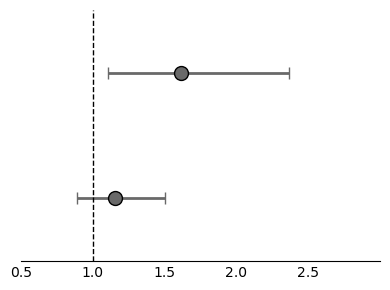

In [89]:
fig, ax = plt.subplots(1,1, figsize=[4,3])

plot_ors(ax=ax, df=df, last=True)